In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('./lifeform-plants-study-area/data.csv')

In [3]:
data.shape

(1226310, 58)

In [4]:
# ALA has some dodgy records that are not actually plants or not vascular plants (which is what i want), so i'm just filtering to remove them here.

In [5]:
data.head()

,Record ID,Catalogue Number,Taxon Concept GUID,Scientific Name - original,Vernacular name - original,Scientific Name,Taxon Rank,Vernacular name,Kingdom,Phylum,Class,Order,Family,Genus,Species,Subspecies,Data Resource ID,Data Resource Name,Institution ID,Institution,Collection ID,Collection,Licence,Institution Code,Collection Code,Locality,Latitude - original,Longitude - original,Geodetic datum - original,Latitude,Longitude,Coordinate Precision,Coordinate Uncertainty in Metres,Country - parsed,State - parsed,Local Government Areas 2011,IMCRA 4 Regions,IBRA 7 Regions,Minimum elevation in meters,Maximum elevation in meters,Minimum depth in meters,Maximum depth in meters,Individual count,Collector,Year,Month,Day,Event Date - parsed,Verbatim event date,Basis Of Record - original,Basis Of Record,Occurrence status,Sex,Preparations,Outlier for layer,Taxonomic Quality,Location Quality,CAPAD 2010 Terrestrial
0,ffff8ea0-eeb1-4cc5-b439-caed45b17392,NSW 651513,https://id.biodiversity.org.au/node/apni/2913645,Pimelea curviflora var. divergens Threlfall,NaN,Pimelea curviflora var. divergens,variety,NaN,Plantae,Charophyta,Equisetopsida,Malvales,Thymelaeaceae,Pimelea,Pimelea curviflora,Pimelea curviflora var. divergens,dr376,MEL AVH data,in50,The Royal Botanic Gardens & Domain Trust,co54,National Herbarium of New South Wales,CC-BY 4.0 (Int),NSW,NSW,Glen Innes.,-29.720000,151.720000,NaN,-29.720000,151.720000,NaN,5000.0,Australia,New South Wales,Glen Innes Severn (A),NaN,New England Tablelands,NaN,NaN,NaN,NaN,NaN,"Deane, H.",1885.0,4.0,NaN,1885-04-01,NaN,PreservedSpecimen,PreservedSpecimen,present,NaN,sheet,NaN,True,True,NaN
1,fffed8dd-3303-4861-9ae5-e515f669a781,BRI AQ0422383,https://id.biodiversity.org.au/taxon/apni/5128...,Teucrium junceum (A.Cunn. ex Walp.) Kattari & ...,NaN,Teucrium junceum,species,NaN,Plantae,Charophyta,Equisetopsida,Lamiales,Lamiaceae,Teucrium,Teucrium junceum,NaN,dr2287,bri_avh,in42,Queensland Department of Environment and Science,co49,Queensland Herbarium,NaN,BRI,Herbrecs,SUNDOWN NP,-28.916667,151.583333,AGD66,-28.915212,151.584156,NaN,16000.0,Australia,Queensland,Southern Downs (R),NaN,Nandewar,NaN,NaN,NaN,NaN,NaN,"Sharpe, P.R.",1985.0,4.0,6.0,1985-04-06,1985-04-06,PreservedSpecimen,PreservedSpecimen,present,NaN,sheet,NaN,True,True,Sundown
2,fffebfcb-1f80-4ade-9b9b-83475af6151c,SCOS1605240S,https://id.biodiversity.org.au/node/apni/2898873,Synoum glandulosum subsp. glandulosum,Scentless Rosewood,Synoum glandulosum subsp. glandulosum,subspecies,NaN,Plantae,Charophyta,Equisetopsida,Sapindales,Meliaceae,Synoum,Synoum glandulosum,Synoum glandulosum subsp. glandulosum,dr368,OEH Atlas of NSW Wildlife,NaN,NaN,NaN,NaN,CC-BY 4.0 (Int),"NSW Dept of Planning, Industry and Environment",BioNet Atlas of NSW Wildlife,locality withheld,-30.902514,152.873047,GDA94,-30.902514,152.873047,NaN,10.0,Australia,New South Wales,Kempsey (A),NaN,NSW North Coast,15.0,15.0,NaN,NaN,NaN,OJXK98101602,2016.0,4.0,28.0,2016-04-28,NaN,HumanObservation,HumanObservation,present,NaN,NaN,NaN,True,True,NaN
3,fffce8d8-6a83-41e6-8c49-1e2e4c9392c8,BRI AQ0708425,NZOR-6-1194,Audouinella,NaN,Audouinella,genus,NaN,Plantae,Rhodophyta,Florideophyceae,Acrochaetiales,Acrochaetiaceae,Audouinella,NaN,NaN,dr2287,bri_avh,in42,Queensland Department of Environment and Science,co49,Queensland Herbarium,NaN,BRI,Herbrecs,WHITE WATER CK BALLOW DISTRICT (COLL. NO. 742.2),-28.275000,152.625000,AGD66,-28.273540,152.625803,NaN,1600.0,Australia,Queensland,Scenic Rim (R),NaN,South Eastern Queensland,NaN,NaN,NaN,NaN,NaN,"Cribb, A.B.",1973.0,4.0,21.0,1973-04-21,1973-04-21,PreservedSpecimen,PreservedSpecimen,present,NaN,sheet,NaN,True,True,Mount Barney
4,fffbc9c8-d4ca-43c7-9c4b-dcfa8ad1e601,SPJGI3874747,https://id.biodiversity.org.au/node/apni/2902186,Symplocos thwaitesii,Buff Hazelwood,Symplocos thwaitesii,species,NaN,Plantae,Charophyta,Equisetopsida,Ericales,Symplocaceae,Symplocos,Symplocos thwaitesii,NaN,dr368,OEH Atlas of NSW Wildlife,NaN,NaN,NaN,NaN,CC-BY 4.0 (Int),"NSW Dept of Planni

In [6]:
plants = data[(data['Kingdom'] == "Plantae")
     & (data['Phylum'] != "Bryophyta") 
     & (data['Phylum'] != "Anthocerotophyta") 
     & (data['Phylum'] != "Marchantiophyta") 
     & (data['Phylum'] != "Rhodophyta")]

In [7]:
plants.shape

(1204225, 58)

In [8]:
# 7567 unique species here so far

In [9]:
plants.Species.nunique()

7567

In [10]:
species_in_study_area = plants.Species.unique().tolist()

In [11]:
# make into dataframe

In [12]:
species_in_study_area_df = pd.DataFrame(species_in_study_area, columns=['Species'])

In [13]:
# export the names of species in sizeable chunks to search in ALA again, but this time for ALL OF AUSTRALIA to get records. 
# species are split into lists of 2000 because the download file will be enormous if i did it all at once and ALA will freeze.

In [14]:
species_in_study_area_df[0:2000].to_csv('./1.csv')
species_in_study_area_df[2001:4000].to_csv('./2.csv')
species_in_study_area_df[4001:6000].to_csv('./3.csv')
species_in_study_area_df[6001:7568].to_csv('./4.csv')


In [15]:
# import the downloaded records again using pandas.
one = pd.read_csv('./v4-init-29-7/one.csv')
two = pd.read_csv('./v4-init-29-7/two.csv')
three = pd.read_csv('./v4-init-29-7/three.csv')
four = pd.read_csv('./v4-init-29-7/four.csv')

/Users/lilly/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (26,27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
# subset to only the columns needed to make it a smaller dataframe to work with
one = one[['Species', 'Latitude', 'Longitude', 'Coordinate Uncertainty in Metres', 'Year' , 'Occurrence status']]
two = two[['Species', 'Latitude', 'Longitude', 'Coordinate Uncertainty in Metres', 'Year' , 'Occurrence status']]
three = three[['Species', 'Latitude', 'Longitude', 'Coordinate Uncertainty in Metres', 'Year' , 'Occurrence status']]
four = four[['Species', 'Latitude', 'Longitude', 'Coordinate Uncertainty in Metres', 'Year' , 'Occurrence status']]

In [17]:
# concatenate data
new_data = pd.concat([one, two, three, four])

In [18]:
new_data.shape

(10698220, 6)

In [19]:
# group by species and find max and min latitudes
max_latitude = new_data.groupby(['Species'])['Latitude'].transform(max)
new_data['maxlat'] = max_latitude
min_latitude = new_data.groupby(['Species'])['Latitude'].transform(min)
new_data['minlat'] = min_latitude

In [20]:
new_data.maxlat

0         -29.403611
1          21.133333
2         -17.469450
3         -22.583158
4          31.001546
             ...    
1152022   -10.123509
1152023    -5.216700
1152024    59.970000
1152025    30.333333
1152026    15.551667
Name: maxlat, Length: 10698220, dtype: float64

In [21]:
# occurence data needs to be species that have entire distribution between -27 and -31, so subset data as follows:
oc_data = new_data[(new_data['maxlat'] <= -27) & (new_data['maxlat'] >= -31) & (new_data['minlat'] >= -31) & (new_data['minlat'] <= -27)]

In [22]:
species_list = pd.DataFrame(oc_data.Species.value_counts())

In [23]:
## export species list to csv file for ease of access 
## this is now a list of species with distributions only in study area. 
# species_list.to_csv('./species-list-29-07.csv', header=True)

In [24]:
species_list

,Species
Angophora robur,1049
Grevillea rhizomatosa,921
Desmodium acanthocladum,474
Triunia youngiana,428
Symplocos baeuerlenii,421
...,...
Bauhinia yunnanensis,1
Cladonia floerkiana,1
Olearia incana,1
Xanthium canescens,1


In [25]:
# Here, because it took me a couple of days to do everything from the top, i downloaded the records again from ALA because
# ALA is constantly being updated and i wanted the most up-to-date records i could get. 

In [26]:
five = pd.read_csv('./v4-init-29-7/five.csv')

In [27]:
five.columns

Index(['Record ID', 'Catalogue Number', 'Taxon Concept GUID',
       'Scientific Name - original', 'Vernacular name - original',
       'Scientific Name', 'Taxon Rank', 'Vernacular name', 'Kingdom', 'Phylum',
       'Class', 'Order', 'Family', 'Genus', 'Species', 'Subspecies',
       'Data Resource ID', 'Data Resource Name', 'Institution ID',
       'Institution', 'Collection ID', 'Collection', 'Licence',
       'Institution Code', 'Collection Code', 'Locality',
       'Latitude - original', 'Longitude - original',
       'Geodetic datum - original', 'Latitude', 'Longitude',
       'Coordinate Precision', 'Coordinate Uncertainty in Metres',
       'Country - parsed', 'State - parsed', 'Local Government Areas 2011',
       'IMCRA 4 Regions', 'IBRA 7 Regions', 'Minimum elevation in meters',
       'Maximum elevation in meters', 'Minimum depth in meters',
       'Maximum depth in meters', 'Individual count', 'Collector', 'Year',
       'Month', 'Day', 'Event Date - parsed', 'Verbatim even

In [28]:
five = five[['Species', 'Latitude', 'Longitude', 'Coordinate Uncertainty in Metres', 'Year' , 'Occurrence status']]

In [29]:
# i did this again just to be sure that no species were added that lied outside the latitude range i wanted in the final data.
# it looks like since the last record download, some species were recorded to be outside the range i wanted, so there
# are fewer species here than before, which is expected beacuse i'm working from a live database.
# results will be accurate only to 29-07-20. 

five['maxlat'] = five.groupby(['Species'])['Latitude'].transform(max)
five['minlat'] = five.groupby(['Species'])['Latitude'].transform(min)

In [30]:
five_oc_data = five[(five['maxlat'] <= -27.) 
                    & (five['maxlat'] >= -31.) 
                    & (five['minlat'] >= -31.) 
                    & (five['minlat'] <= -27.)]

In [31]:
five_oc_data.Species.nunique()

261

In [32]:
five_oc_data.to_csv('./oc-data-wna-values-29-07')

<AxesSubplot:>

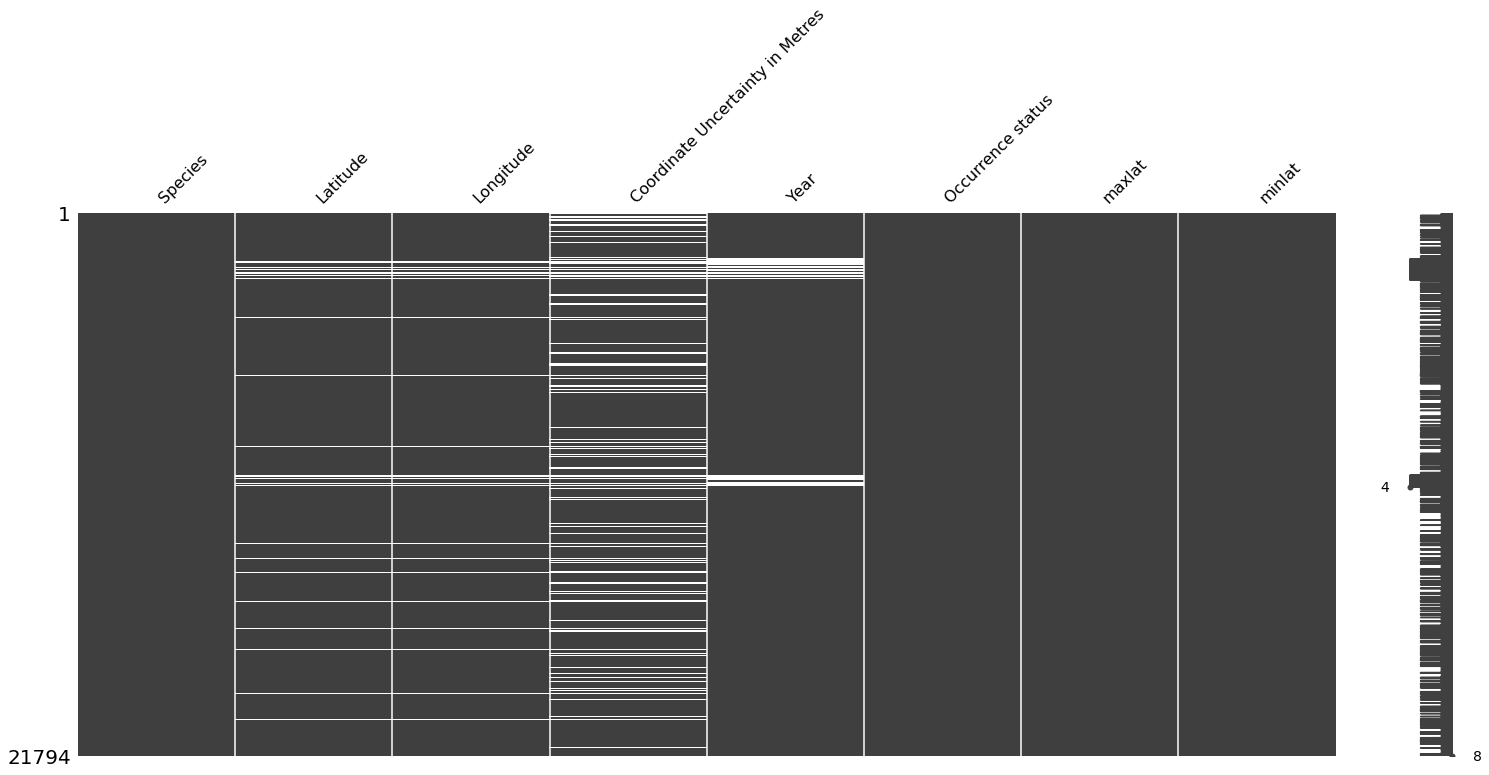

In [33]:
import missingno as msno
msno.matrix(five_oc_data)

In [34]:
oc_data = five_oc_data.dropna()

In [35]:
# filter to less than 1km coordiante uncerntainty
less1km = oc_data[(oc_data['Coordinate Uncertainty in Metres'] <= 1000)]
less1km.shape

(14124, 8)

In [36]:
# count number of records for each species
less1km['record_count'] = less1km.groupby(['Species'])['Latitude'].transform('count')

/Users/lilly/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
# filter to only species with greater than 30 records
more30records = less1km[(less1km['record_count'] >= 30)]

In [38]:
# 81 species left at the end
more30records.Species.nunique()

81

In [39]:
finalspecieslist = more30records.groupby(by=['Species', 'record_count'], as_index=False).first()[['Species', 'record_count']]
finalspecieslist
## exported final species list
# finalspecieslist.to_csv('./final species list 2907.csv')

,Species,record_count
0,Acacia baeuerlenii,79
1,Acacia beadleana,30
2,Acacia floydii,56
3,Acacia macnuttiana,98
4,Acacia ruppii,252
...,...,...
76,Triunia youngiana,454
77,Uromyrtus australis,302
78,Uromyrtus lamingtonensis,35
79,Westringia rupicola,37


In [40]:
oc_data = more30records
oc_data

,Species,Latitude,Longitude,Coordinate Uncertainty in Metres,Year,Occurrence status,maxlat,minlat,record_count
1,Uromyrtus australis,-28.562943,153.343073,20.0,2017.0,present,-27.673600,-30.333333,302
2,Persoonia rufa,-29.627578,151.946924,100.0,1993.0,present,-28.770000,-30.337723,206
3,Uromyrtus australis,-28.519591,153.352642,20.0,2017.0,present,-27.673600,-30.333333,302
6,Macrozamia fawcettii,-29.949267,153.237874,100.0,1995.0,present,-28.465081,-30.534991,205
8,Eucalyptus codonocarpa,-29.528935,152.268375,100.0,1974.0,present,-28.200000,-30.440876,256
...,...,...,...,...,...,...,...,...,...
25929,Pimelea cremnophila,-30.919250,151.855274,30.0,2004.0,present,-30.741700,-30.937500,35
25932,Angophora robur,-29.560438,153.155384,5.0,2014.0,present,-29.442845,-30.095105,1563
25934,Angophora robur,-29.553127,153.155610,5.0,2014.0,present,-29.442845,-30.095105,1563
25935,Angophora robur,-29.723018,153.118648,5.0,2014.0,present,-29.442845,-30.095105,1563


In [41]:
## exported final occurence data
# oc_data.to_csv('./oc-data-29-07.csv')